## Data Collection and Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [2]:
# Load Datasets
train = pd.read_csv('/kaggle/input/classify-customers-to-predict-bank-customer-churn/train.csv')
test = pd.read_csv('/kaggle/input/classify-customers-to-predict-bank-customer-churn/test.csv')

# Descriptive Statistics

In [3]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15778838.0,Mazzanti,582.0,Germany,Female,39.0,8.0,125534.51,1.0,1.0,0.0,131281.28,0.0
1,1,15788151.0,Burtch,744.0,France,Female,29.0,7.0,0.00,2.0,1.0,1.0,93829.17,0.0
2,2,15588928.0,Frolov,752.0,Spain,Male,32.0,3.0,0.00,2.0,0.0,0.0,125979.36,0.0
3,3,15694890.0,Lu,749.0,Germany,Female,54.0,7.0,82916.43,2.0,1.0,1.0,131736.23,0.0
4,4,15742841.0,Macleod,770.0,Spain,Male,43.0,2.0,0.00,2.0,1.0,0.0,157527.60,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


The dataset have 14 columns with 15000 observations and 0 null columns.

In [5]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.569155e+07,658.298667,37.870733,5.029200,42679.586385,1.592267,0.780333,0.495000,117987.539889,0.205933
std,4330.271354,1.931557e+05,72.588374,8.171304,2.784349,59632.693741,0.529439,0.414035,0.499992,45509.878819,0.404395
min,0.000000,1.563152e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,447.730000,0.000000
25%,3749.750000,1.563609e+07,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82985.052500,0.000000
50%,7499.500000,1.569080e+07,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123866.430000,0.000000
75%,11249.250000,1.575907e+07,708.000000,42.000000,7.000000,110148.580000,2.000000,1.000000,1.000000,156448.760000,0.000000
max,14999.000000,1.581566e+07,850.000000,74.000000,15.000000,208614.240000,4.000000,1.000000,1.000000,626144.090000,1.000000


- The average credit score is about `658`. with a standard deviation of `72.5`
- The average age of customer is approximately  `39` years with a age range of `18` - `74` 
- The average tenure is or a customer is about `5` years and median is `0` with min tenure of 3 and maximun tenure of 15.
- The mean balance is `42679` and standard deviation of `59632`. This tells that balance varies widely.
- On average, customers use about `1.59` products, with most customers using either `1` or` 2` products.
- Approximately `78%` of the customers have a credit card.
- About `49.5%` of the customers are active members.
- The average estimated salary is around `117,988` with a wide range from `447` to `626,144`
- About `20.6%` of the customers have exited the bank.

In [6]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values in the columns.

# Understanding Data Distributions and Outlier Detection

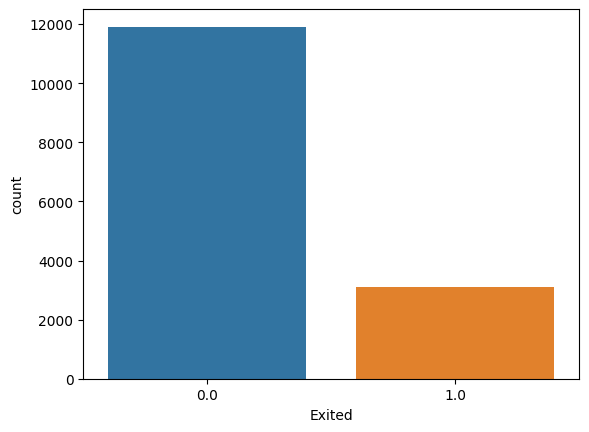

In [7]:
sns.countplot(x='Exited', data=train)
plt.show()

In [8]:
# Pairplot for numerical features
numerical_df = train.select_dtypes(include=['float64', 'int64'])
print(numerical_df)


          id  CustomerId  CreditScore   Age  Tenure    Balance  NumOfProducts  \
0          0  15778838.0        582.0  39.0     8.0  125534.51            1.0   
1          1  15788151.0        744.0  29.0     7.0       0.00            2.0   
2          2  15588928.0        752.0  32.0     3.0       0.00            2.0   
3          3  15694890.0        749.0  54.0     7.0   82916.43            2.0   
4          4  15742841.0        770.0  43.0     2.0       0.00            2.0   
...      ...         ...          ...   ...     ...        ...            ...   
14995  14995  15797733.0        850.0  38.0     1.0       0.00            1.0   
14996  14996  15723894.0        614.0  36.0     7.0  108664.85            2.0   
14997  14997  15771742.0        619.0  31.0     4.0       0.00            2.0   
14998  14998  15626485.0        513.0  48.0     4.0  126473.33            2.0   
14999  14999  15583857.0        756.0  34.0     1.0       0.00            2.0   

       HasCrCard  IsActiveM

In [9]:
corr = numerical_df.corr()

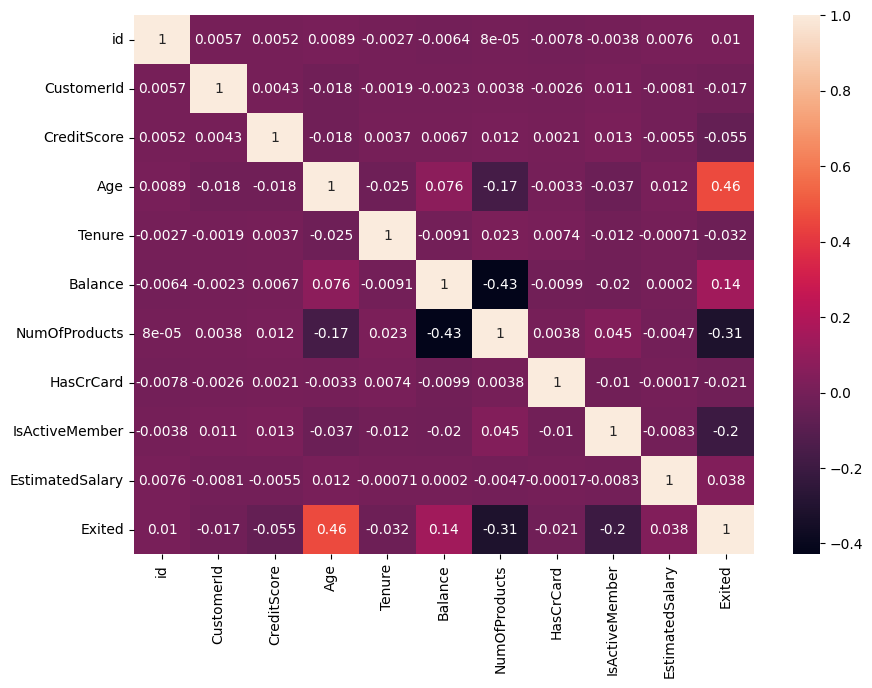

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True)
plt.show()

In [11]:
# Convert 'Exited' to boolean
train['Exited'] = train['Exited'].astype(bool)

In [12]:
# Remove 'id' and 'CustomerId'
features_to_drop = ['id', 'CustomerId', 'Surname']
X = train.drop(features_to_drop + ['Exited'], axis=1)
y = train['Exited']

In [13]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Define column types
categorical_cols = ['Geography', 'Gender']
numerical_cols = X.columns.drop(categorical_cols).tolist()

In [15]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [16]:
# Create preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [17]:
# Define hyperparameters for tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}


In [18]:
# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)


In [19]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'HasCrCard',
                                                                          'IsActiveMember',
                                                                          'EstimatedSalary']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [20]:
# Make predictions on validation set
y_pred = grid_search.predict(X_val)
y_pred_proba = grid_search.predict_proba(X_val)[:, 1]

In [21]:
y_pred_proba

array([0.02098139, 0.22174896, 0.14058737, ..., 0.10785057, 0.23116253,
       0.02255641])

In [22]:
# Print results
print("Best parameters:", grid_search.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation ROC AUC:", roc_auc_score(y_val, y_pred_proba))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Validation Accuracy: 0.8943333333333333
Validation ROC AUC: 0.933782934662356

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2372
        True       0.83      0.62      0.71       628

    accuracy                           0.89      3000
   macro avg       0.87      0.79      0.82      3000
weighted avg       0.89      0.89      0.89      3000



In [23]:
# Feature importance
feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = (numerical_cols + 
                 grid_search.best_estimator_.named_steps['preprocessor']
                 .named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist())


In [24]:
# Sort features by importance
sorted_idx = np.argsort(feature_importance)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

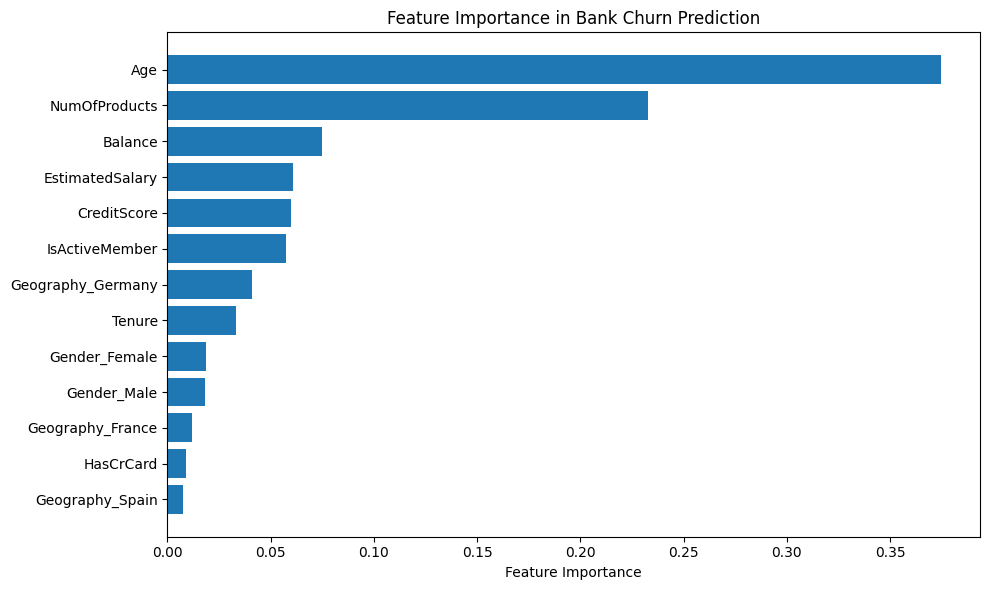

In [25]:
# Plot feature importance using matplotlib
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(sorted_features))
plt.barh(y_pos, sorted_importance, align='center')
plt.yticks(y_pos, sorted_features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Bank Churn Prediction')
plt.tight_layout()
plt.show()

In [26]:
test = pd.read_csv('/kaggle/input/classify-customers-to-predict-bank-customer-churn/test.csv')

In [27]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15664005.0,Walker,686.0,France,Male,32.0,8.0,0.00,2.0,0.0,0.0,137537.19
1,15001,15711015.0,Chu,669.0,Germany,Male,36.0,10.0,152880.97,1.0,1.0,1.0,183358.21
2,15002,15579994.0,H?,613.0,Germany,Female,43.0,1.0,132730.17,1.0,1.0,0.0,121894.31
3,15003,15688865.0,T'ien,588.0,France,Male,47.0,7.0,0.00,2.0,1.0,0.0,163666.85
4,15004,15749679.0,Tseng,652.0,Spain,Male,40.0,2.0,0.00,2.0,1.0,0.0,98894.64


In [28]:
pipeline.fit(X, y)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [29]:
# Prepare test data
X_test = test.drop(features_to_drop, axis=1)



In [30]:
# Make predictions on test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]



In [31]:
y_pred_proba

array([0.  , 0.12, 0.96, ..., 0.16, 0.29, 0.15])

In [32]:
output = pd.DataFrame(y_pred_proba, index=test.id, columns=['Exited'])
output

,Exited
id,
15000,0.00
15001,0.12
15002,0.96
15003,0.15
15004,0.12
...,...
24995,0.32
24996,0.00
24997,0.16


In [33]:
output

,Exited
id,
15000,0.00
15001,0.12
15002,0.96
15003,0.15
15004,0.12
...,...
24995,0.32
24996,0.00
24997,0.16


In [34]:
output.columns

Index(['Exited'], dtype='object')

In [35]:
output.to_csv('predictions.csv')

In [36]:
pd.read_csv('predictions.csv')

,id,Exited
0,15000,0.00
1,15001,0.12
2,15002,0.96
3,15003,0.15
4,15004,0.12
...,...,...
9995,24995,0.32
9996,24996,0.00
9997,24997,0.16
9998,24998,0.29


In [37]:
pd.read_csv('/kaggle/input/classify-customers-to-predict-bank-customer-churn/sample_submission.csv')

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5
...,...,...
9995,24995,0.5
9996,24996,0.5
9997,24997,0.5
9998,24998,0.5
